In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("Amazon Sale Report.csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           128941 no

In [ ]:
print(df.describe())

              index           Qty        Amount  ship-postal-code  New  \
count  77868.000000  77867.000000  73223.000000      77845.000000  0.0   
mean   38931.887862      0.901409    643.227489     463224.607104  NaN   
std    22479.620641      0.321134    278.397015     193399.312431  NaN   
min        0.000000      0.000000      0.000000     110001.000000  NaN   
25%    19465.750000      1.000000    446.000000     380054.000000  NaN   
50%    38932.500000      1.000000    599.000000     500026.000000  NaN   
75%    58399.250000      1.000000    788.000000     600033.000000  NaN   
max    77866.000000     15.000000   5584.000000     989898.000000  NaN   

       PendingS  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN  


In [27]:
df.shape

(128976, 23)

In [29]:
df.dtypes


,0
index,int64
Order ID,object
Date,datetime64[ns]
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Category,object
Size,object
Courier Status,object


In [30]:
df[df.duplicated()]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS,Category_Encoded,ship_state_encoded
201,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN,0,5
202,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN,1,6
203,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN,0,6
204,9,402-4393761-0311520,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN,1,3
205,10,407-5633625-6970741,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,...,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,6278,171-5170733-7855514,2022-04-26,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,...,HYDERABAD,TELANGANA,500083.0,IN,False,Easy Ship,NaN,NaN,0,6
6641,6279,403-8137343-5206760,2022-04-26,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,...,KALPETTA,KERALA,673122.0,IN,False,Easy Ship,NaN,NaN,0,15
6642,6280,408-1575454-3263526,2022-04-26,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Blazzer,M,Shipped,...,CHENNAI,TAMIL NADU,600049.0,IN,False,Easy Ship,NaN,NaN,2,3
6643,6281,171-2918708-7197155,2022-04-26,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,XXL,Shipped,...,PUNE,MAHARASHTRA,412207.0,IN,False,Easy Ship,NaN,NaN,2,0


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
print(df.isnull().sum())

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7789
Amount                  7789
ship-city                 33
ship-state                33
ship-postal-code          33
ship-country              33
B2B                        0
fulfilled-by           89595
New                   128808
PendingS              128808
Category_Encoded           0
ship_state_encoded         0
dtype: int64


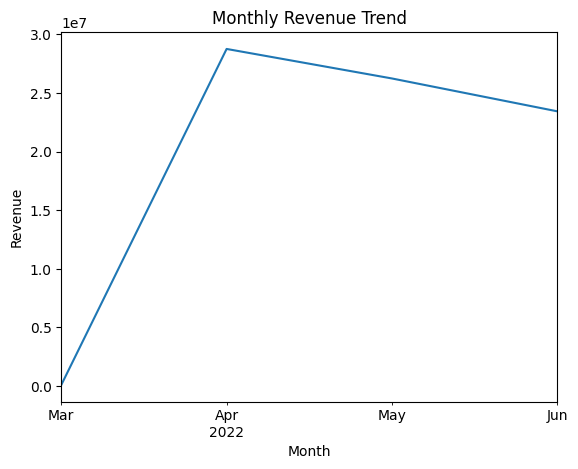

In [33]:
df['Date'] = pd.to_datetime(df['Date'])
revenue_trend = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
revenue_trend.plot(kind='line', title='Monthly Revenue Trend', xlabel='Month', ylabel='Revenue')
plt.show()


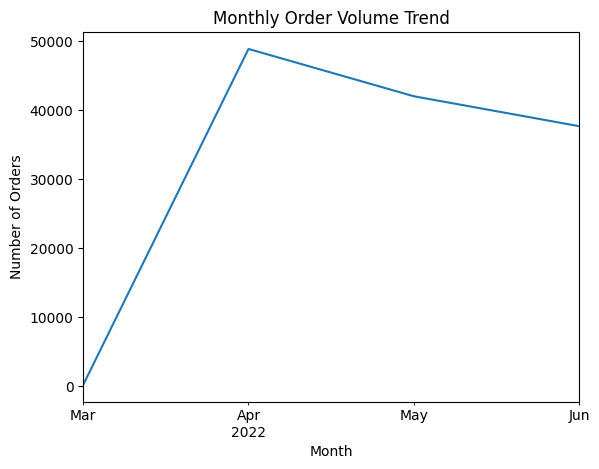

In [34]:
order_volume_trend = df.groupby(df['Date'].dt.to_period('M'))['Order ID'].count()
order_volume_trend.plot(kind='line', title='Monthly Order Volume Trend', xlabel='Month', ylabel='Number of Orders')
plt.show()


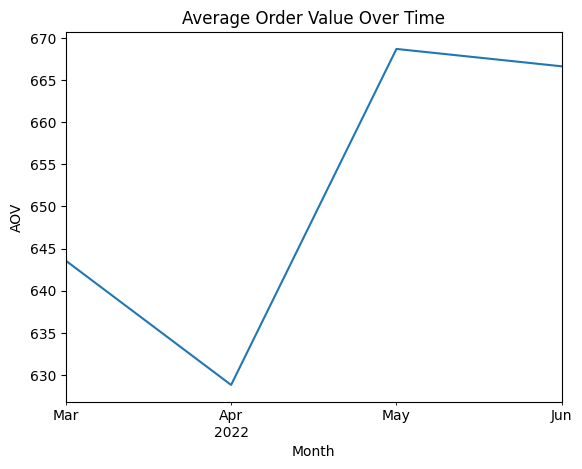

In [35]:
aov = df.groupby(df['Date'].dt.to_period('M')).apply(lambda x: x['Amount'].sum() / x['Order ID'].nunique())
aov.plot(kind='line', title='Average Order Value Over Time', xlabel='Month', ylabel='AOV')
plt.show()


In [49]:
import plotly.express as px

df_grouped = df.groupby(['Category', 'Size'])['Qty'].sum().reset_index()
fig = px.sunburst(df_grouped, path=['Category', 'Size'], values='Qty', color='Qty',
                  color_continuous_scale='RdBu', title="Sales Breakdown by Category and Size")
fig.show()


In [52]:
import plotly.graph_objects as go

sankey_df = df.groupby(['Fulfilment', 'Courier Status', 'Sales Channel'])['Qty'].sum().reset_index()

all_nodes = list(set(sankey_df['Fulfilment']) | set(sankey_df['Courier Status']) | set(sankey_df['Sales Channel']))
node_indices = {node: idx for idx, node in enumerate(all_nodes)}

links = {
    'source': [],
    'target': [],
    'value': []
}

for _, row in sankey_df.iterrows():
    links['source'].append(node_indices[row['Fulfilment']])
    links['target'].append(node_indices[row['Courier Status']])
    links['value'].append(row['Qty'])
    links['source'].append(node_indices[row['Courier Status']])
    links['target'].append(node_indices[row['Sales Channel']])
    links['value'].append(row['Qty'])

fig = go.Figure(go.Sankey(
    node = {'pad': 15, 'thickness': 20, 'line': {'color': 'black', 'width': 0.5},
            'label': all_nodes},
    link = links
))

fig.update_layout(title_text='Order Flow from Fulfilment to Sales Channel', font_size=10)
fig.show()



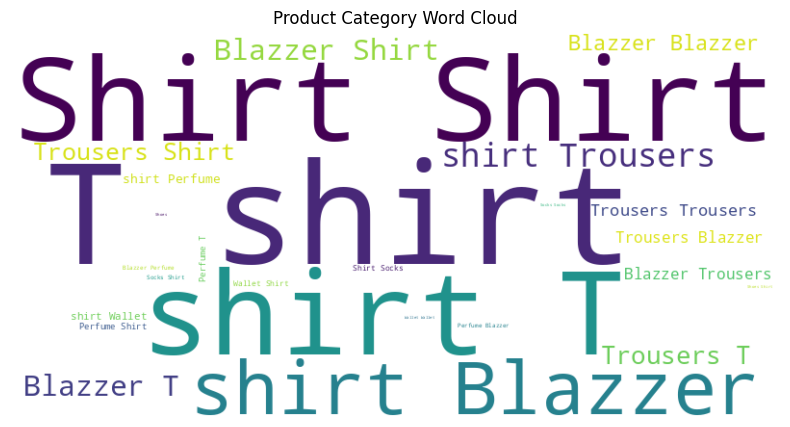

In [55]:
from wordcloud import WordCloud

text = ' '.join(df['Category'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Product Category Word Cloud')
plt.show()


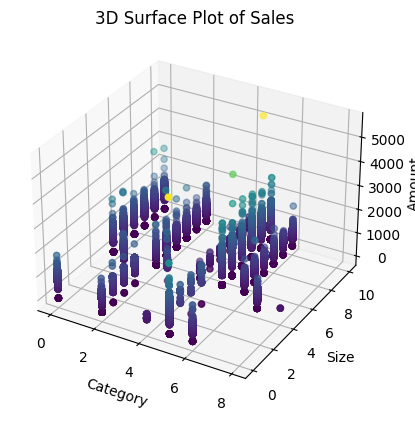

In [56]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

categories = df['Category'].astype('category').cat.codes
sizes = df['Size'].astype('category').cat.codes
amounts = df['Amount']

ax.scatter(categories, sizes, amounts, c=amounts, cmap='viridis', marker='o')
ax.set_xlabel('Category')
ax.set_ylabel('Size')
ax.set_zlabel('Amount')
plt.title('3D Surface Plot of Sales')
plt.show()


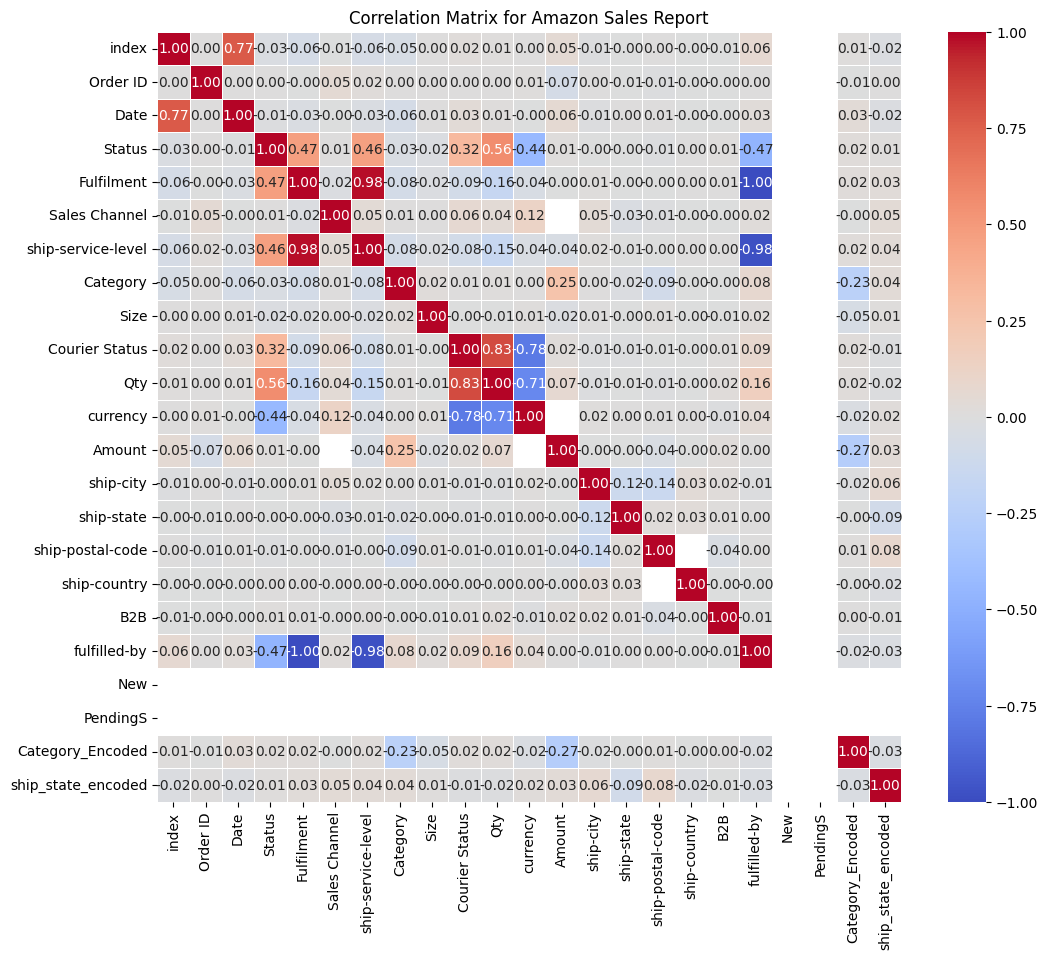

In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])


correlation_matrix = df.corr().astype('float32')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix for Amazon Sales Report')
plt.show()

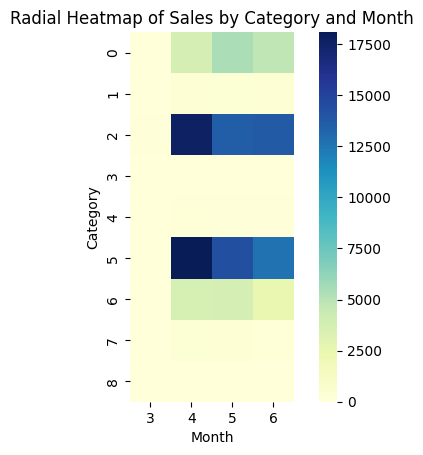

In [62]:
import seaborn as sns
import numpy as np

df['Month'] = df['Date'].dt.month
heatmap_data = df.pivot_table(index='Category', columns='Month', values='Qty', aggfunc='sum').fillna(0)

sns.heatmap(heatmap_data, cmap='YlGnBu', cbar=True, square=True)
plt.title('Radial Heatmap of Sales by Category and Month')
plt.show()



In [63]:
import plotly.graph_objects as go

fulfillment_counts = df['Fulfilment'].value_counts()
categories = fulfillment_counts.index
values = fulfillment_counts.values

fig = go.Figure(go.Barpolar(
    r=values,
    theta=[(360/len(values)) * i for i in range(len(values))],
    marker_color=values,
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max(values)])
    ),
    showlegend=False
)

fig.update_layout(
    title='Radial Bar Chart of Fulfillment Methods',
)
fig.show()
